# Hyperfine Structure: Optical Pumping

Rb87 5s_{1/2}_F2 -> 5p_{3/2}_F3

## Define the Hyperfine Structure

In [1]:
import numpy as np

In [2]:
from maxwellbloch import hyperfine

width = 1.0 #5.75000 # [2π MHz]

Rb87_5s12_F1 = hyperfine.LevelF(I=1.5, J=0.5, F=1)
Rb87_5s12_F2 = hyperfine.LevelF(I=1.5, J=0.5, F=2)

Rb87_5p32_F3 = hyperfine.LevelF(I=1.5, J=1.5, F=3)

atom1e = hyperfine.Atom1e(element='Rb', isotope='87')

atom1e.add_F_level(Rb87_5s12_F1)
atom1e.add_F_level(Rb87_5s12_F2)
atom1e.add_F_level(Rb87_5p32_F3)

In [3]:
atom1e

{
  "F_levels": [
    {
      "F": 1,
      "I": 1.5,
      "J": 0.5,
      "energy": 0.0,
      "mF_levels": [
        {
          "energy": 0.0,
          "mF": -1.0
        },
        {
          "energy": 0.0,
          "mF": 0.0
        },
        {
          "energy": 0.0,
          "mF": 1.0
        }
      ]
    },
    {
      "F": 2,
      "I": 1.5,
      "J": 0.5,
      "energy": 0.0,
      "mF_levels": [
        {
          "energy": 0.0,
          "mF": -2.0
        },
        {
          "energy": 0.0,
          "mF": -1.0
        },
        {
          "energy": 0.0,
          "mF": 0.0
        },
        {
          "energy": 0.0,
          "mF": 1.0
        },
        {
          "energy": 0.0,
          "mF": 2.0
        }
      ]
    },
    {
      "F": 3,
      "I": 1.5,
      "J": 1.5,
      "energy": 0.0,
      "mF_levels": [
        {
          "energy": 0.0,
          "mF": -3.0
        },
        {
          "energy": 0.0,
          "mF": -2.0
        },
       

In [4]:
NUM_STATES = atom1e.get_num_mF_levels()
print(NUM_STATES)

15


In [5]:
ENERGIES = atom1e.get_energies()
print(ENERGIES)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [6]:
# Tune to be on resonance with the F2 -> F3 transition
DETUNING = 0.#E_p32_F3 - E_s12_F2
print(DETUNING)

0.0


In [7]:
FIELD_CHANNELS = atom1e.get_coupled_levels(F_level_idxs_a=(1,), F_level_idxs_b=(2,))
print(FIELD_CHANNELS)

[[3, 8], [3, 9], [3, 10], [3, 11], [3, 12], [3, 13], [3, 14], [4, 8], [4, 9], [4, 10], [4, 11], [4, 12], [4, 13], [4, 14], [5, 8], [5, 9], [5, 10], [5, 11], [5, 12], [5, 13], [5, 14], [6, 8], [6, 9], [6, 10], [6, 11], [6, 12], [6, 13], [6, 14], [7, 8], [7, 9], [7, 10], [7, 11], [7, 12], [7, 13], [7, 14]]


In [8]:
q = -1 # Field polarisation
FIELD_FACTORS = atom1e.get_clebsch_hf_factors(F_level_idxs_a=(1,), F_level_idxs_b=(2,), q=q)
print(FIELD_FACTORS)
print(np.sum(FIELD_FACTORS**2))

[ 0.          0.          0.18257419  0.          0.          0.
  0.         -0.         -0.         -0.          0.31622777 -0.
 -0.         -0.          0.          0.          0.          0.
  0.4472136   0.          0.         -0.         -0.         -0.
 -0.         -0.          0.57735027 -0.          0.          0.
  0.          0.          0.          0.          0.70710678]
1.166666666666667


In [9]:
DECAY_CHANNELS = atom1e.get_coupled_levels(F_level_idxs_a=(0,1), F_level_idxs_b=(2,))
print(DECAY_CHANNELS)

[[0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [0, 14], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [1, 14], [2, 8], [2, 9], [2, 10], [2, 11], [2, 12], [2, 13], [2, 14], [3, 8], [3, 9], [3, 10], [3, 11], [3, 12], [3, 13], [3, 14], [4, 8], [4, 9], [4, 10], [4, 11], [4, 12], [4, 13], [4, 14], [5, 8], [5, 9], [5, 10], [5, 11], [5, 12], [5, 13], [5, 14], [6, 8], [6, 9], [6, 10], [6, 11], [6, 12], [6, 13], [6, 14], [7, 8], [7, 9], [7, 10], [7, 11], [7, 12], [7, 13], [7, 14]]


In [10]:
DECAY_FACTORS = atom1e.get_decay_factors(F_level_idxs_a=(0, 1), F_level_idxs_b=(2,))
print(DECAY_FACTORS)

[-0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.70710678 -0.40824829  0.18257419
  0.          0.          0.          0.         -0.          0.57735027
 -0.51639778  0.31622777 -0.         -0.         -0.          0.
  0.          0.4472136  -0.54772256  0.4472136   0.          0.
 -0.         -0.         -0.          0.31622777 -0.51639778  0.57735027
 -0.          0.          0.          0.          0.          0.18257419
 -0.40824829  0.70710678]


In [1]:
INITIAL_STATE = (
    [0.0/3.0]*3 + # s12_F1
    [1.0/5.0]*5 + # s12_F2
    [0.0]*7) # p32_F3
# already optically pumped initial state
# INITIAL_STATE = (
#     [0.0]*7 + # s12_F1
#     [1.0] + # s12_F2_mF2
#     [0.0]*7) 
print(INITIAL_STATE)

[0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [1]:
ob_solve_json = """
{{
  "atom": {{
    "decays": [
      {{
        "channels": {decay_channels},
        "rate": 1.0,
        "factors": {decay_factors}
      }}
    ],
    "energies": {energies},
    "fields": [
      {{
        "coupled_levels": {field_channels},
        "factors": {field_factors},
        "detuning": {detuning},
        "detuning_positive": true,
        "label": "probe_1",
        "rabi_freq": 10.0,
        "rabi_freq_t_args": {{
          "ampl": 1.0,
          "on": 0.0,
          "off": 5.0
        }},
        "rabi_freq_t_func": "square"
      }},
      {{
        "coupled_levels": {field_channels},
        "factors": {field_factors},
        "detuning": {detuning},
        "detuning_positive": true,
        "label": "probe_2",
        "rabi_freq": 10.0,
        "rabi_freq_t_args": {{
          "ampl": 1.0,
          "on": 10.0,
          "off": 15.0
        }},
        "rabi_freq_t_func": "square"
      }}
    ],
    "num_states": {num_states},
    "initial_state": {initial_state}
  }},
  "t_min": 0.0,
  "t_max": 20.0,
  "t_steps": 1000,
  "method": "mesolve",
  "opts": {{
    "method": "bdf", 
    "atol": 1e-5, 
    "rtol": 1e-3,
    "nsteps": 1e4
  }},
  "savefile": ""
}}
""".format(num_states=NUM_STATES, energies=ENERGIES, initial_state=INITIAL_STATE, detuning=DETUNING, 
    field_channels=FIELD_CHANNELS, field_factors=list(FIELD_FACTORS), decay_channels=DECAY_CHANNELS, decay_factors=list(DECAY_FACTORS))

NameError: name 'NUM_STATES' is not defined

In [14]:
from maxwellbloch import ob_solve

obs = ob_solve.OBSolve().from_json_str(ob_solve_json)

In [17]:
opts = {'method': 'bdf', 'atol':1e-8, 'rtol':1e-6, 'nsteps':1e4}

In [18]:
obs.solve(show_pbar=True, opts=opts, recalc=True);

10.1%. Run time:   0.05s. Est. time left: 00:00:00:00
20.1%. Run time:   0.09s. Est. time left: 00:00:00:00
30.1%. Run time:   0.14s. Est. time left: 00:00:00:00
40.1%. Run time:   0.18s. Est. time left: 00:00:00:00
50.0%. Run time:   0.26s. Est. time left: 00:00:00:00
60.0%. Run time:   0.79s. Est. time left: 00:00:00:00
70.0%. Run time:   1.05s. Est. time left: 00:00:00:00
80.0%. Run time:   1.21s. Est. time left: 00:00:00:00
90.0%. Run time:   1.25s. Est. time left: 00:00:00:00
Total run time:   1.29s
Saving OBBase to qu/ob-solve-rb87_5s12F2_5p32F3-no-decay-INPROGRESS.qu


In [19]:
pop_0 = np.absolute(obs.states_t()[:,0,0])
pop_1 = np.absolute(obs.states_t()[:,1,1])
pop_2 = np.absolute(obs.states_t()[:,2,2])
pop_3 = np.absolute(obs.states_t()[:,3,3])
pop_4 = np.absolute(obs.states_t()[:,4,4])
pop_5 = np.absolute(obs.states_t()[:,5,5])
pop_6 = np.absolute(obs.states_t()[:,6,6])
pop_7 = np.absolute(obs.states_t()[:,7,7])
pop_8 = np.absolute(obs.states_t()[:,8,8])
pop_9 = np.absolute(obs.states_t()[:,9,9])
pop_10 = np.absolute(obs.states_t()[:,10,10])
pop_11 = np.absolute(obs.states_t()[:,11,11])
pop_12 = np.absolute(obs.states_t()[:,12,12])
pop_13 = np.absolute(obs.states_t()[:,13,13])
pop_14 = np.absolute(obs.states_t()[:,14,14])
# pop_15 = np.absolute(obs.states_t()[:,15,15])

In [20]:
pop_s12_F1 = pop_0 + pop_1 + pop_2
pop_s12_F2 = pop_3 + pop_4 + pop_5 + pop_6 + pop_7
pop_p32_F3 = pop_8 + pop_9 + pop_10 + pop_11 + pop_12 + pop_13 + pop_14

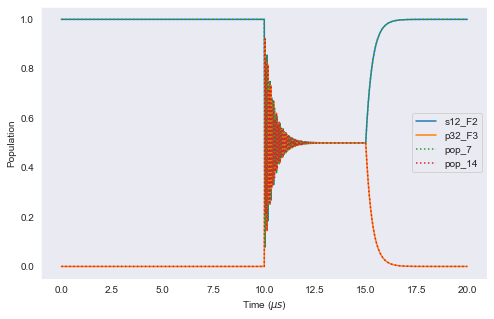

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")

import numpy as np

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
# ax.plot(obs.tlist, pop_s12, label='Ground state')
# ax.plot(obs.tlist, pop_s12_F1, label='s12_F1')
ax.plot(obs.tlist, pop_s12_F2, label='s12_F2')
ax.plot(obs.tlist, pop_p32_F3, label='p32_F3')
ax.plot(obs.tlist, pop_7, label='pop_7', ls='dotted')
ax.plot(obs.tlist, pop_14, label='pop_14', ls='dotted')
ax.set_xlabel(r'Time ($\mu s$)')
ax.set_ylabel(r'Population')
# ax.set_ylim([0.,1])
leg = ax.legend(frameon=True)

# plt.savefig('images/ob-solve-two-rabi-oscillations.png')